**Abstract**

Parkinson's disease is a progressive central nervous system condition that affects movement and causes tremors and stiffness.

It has 5 stages to it and an estimated seven to 10 million people worldwide have Parkinson’s disease. 

This is chronic and still has no cure. It is a neurodegenerative disease that affects the neurons in the brain that contain dopamine.


Details About the Data Set

The dataset was created by Max Little of the University of Oxford, in
collaboration with the National Centre for Voice and Speech, Denver,
Colorado, who recorded the speech signals. 

The original study published the
feature extraction methods for general voice disorders.

Number of Instances: 195

Area: Life

Attribute Characteristics: Real

Number of Attributes: 23

Date Donated: 2008-06-26

Associated Tasks: Classification

Missing Values? N/A

File Size: 39.7 KB



Attribute Information:

Matrix column entries (attributes):

***name*** - ASCII subject name and recording number

***MDVP:Fo(Hz) ***- Average vocal fundamental frequency

***MDVP:Fhi(Hz)*** - Maximum vocal fundamental frequency

***MDVP:Flo(Hz)*** - Minimum vocal fundamental frequency

***MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP*** - Several measures of variation in fundamental frequency

***MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA*** - Several measures of variation in amplitude

***NHR,HNR ***- Two measures of ratio of noise to tonal components in the voice

**status** - Health status of the subject (one) - Parkinson's, (zero) - healthy

***RPDE,D2*** - Two nonlinear dynamical complexity measures

***DFA*** - Signal fractal scaling exponent

***spread1,spread2,PPE*** - Three nonlinear measures of fundamental frequency variation

Please refer to the below link for more details on Computing the fundamental frequency variation spectrum in conversational spoken dialog system.

http://www.cs.cmu.edu/~kornel/pubs/003228.pdf

In [1]:
# make necessary imports

import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import iplot
import plotly as py

In [2]:
os.getcwd()

'C:\\Users\\ssaur\\OneDrive\\Desktop\\End To End ML Project\\Perkisnon Disease Detection'

In [3]:
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',25)
pd.set_option('display.width',200)

In [4]:
df = pd.read_csv('parkinsons.data')

In [5]:
df.shape

(195, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
# find null value
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
for i in df.columns:
    print("*****************************************", i ,
         "*******************************************")
    print()
    print(df[i].unique())#set(df[i].tolist())
    print()

***************************************** name *******************************************

['phon_R01_S01_1' 'phon_R01_S01_2' 'phon_R01_S01_3' 'phon_R01_S01_4'
 'phon_R01_S01_5' 'phon_R01_S01_6' 'phon_R01_S02_1' 'phon_R01_S02_2'
 'phon_R01_S02_3' 'phon_R01_S02_4' 'phon_R01_S02_5' 'phon_R01_S02_6'
 'phon_R01_S04_1' 'phon_R01_S04_2' 'phon_R01_S04_3' 'phon_R01_S04_4'
 'phon_R01_S04_5' 'phon_R01_S04_6' 'phon_R01_S05_1' 'phon_R01_S05_2'
 'phon_R01_S05_3' 'phon_R01_S05_4' 'phon_R01_S05_5' 'phon_R01_S05_6'
 'phon_R01_S06_1' 'phon_R01_S06_2' 'phon_R01_S06_3' 'phon_R01_S06_4'
 'phon_R01_S06_5' 'phon_R01_S06_6' 'phon_R01_S07_1' 'phon_R01_S07_2'
 'phon_R01_S07_3' 'phon_R01_S07_4' 'phon_R01_S07_5' 'phon_R01_S07_6'
 'phon_R01_S08_1' 'phon_R01_S08_2' 'phon_R01_S08_3' 'phon_R01_S08_4'
 'phon_R01_S08_5' 'phon_R01_S08_6' 'phon_R01_S10_1' 'phon_R01_S10_2'
 'phon_R01_S10_3' 'phon_R01_S10_4' 'phon_R01_S10_5' 'phon_R01_S10_6'
 'phon_R01_S13_1' 'phon_R01_S13_2' 'phon_R01_S13_3' 'phon_R01_S13_4'
 'phon_R01_

[1 0]

***************************************** RPDE *******************************************

[0.414783 0.458359 0.429895 0.434969 0.417356 0.415564 0.59604  0.63742
 0.615551 0.547037 0.611137 0.58339  0.4606   0.430166 0.474791 0.565924
 0.56738  0.631099 0.665318 0.649554 0.660125 0.629017 0.61906  0.537264
 0.397937 0.522746 0.418622 0.358773 0.470478 0.427785 0.422229 0.432439
 0.465946 0.368535 0.340068 0.344252 0.360148 0.341435 0.403884 0.396793
 0.32648  0.306443 0.305062 0.457702 0.438296 0.431285 0.467489 0.610367
 0.579597 0.538688 0.553134 0.507504 0.459766 0.420383 0.536009 0.558586
 0.541781 0.530529 0.540049 0.547975 0.341788 0.447979 0.364867 0.25657
 0.27685  0.305429 0.460139 0.498133 0.513237 0.487407 0.489345 0.543299
 0.495954 0.509127 0.437031 0.463514 0.489538 0.429484 0.644954 0.594387
 0.544805 0.576084 0.55461  0.576644 0.556494 0.583574 0.598714 0.602874
 0.599371 0.590951 0.65341  0.501037 0.454444 0.447456 0.50238  0.447285
 0.366329 0.629574 0.57101 

In [9]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

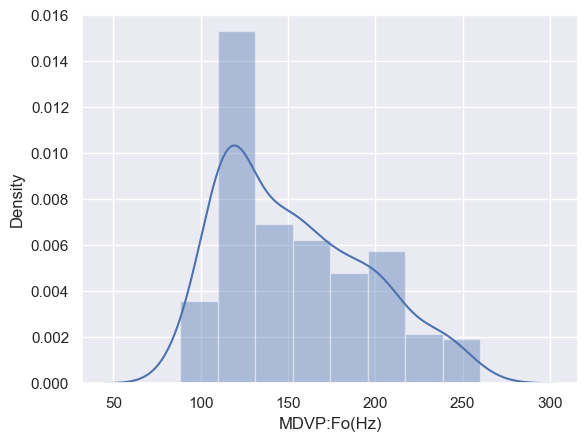

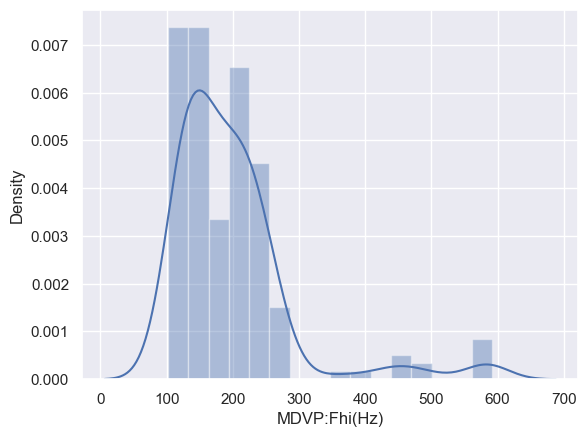

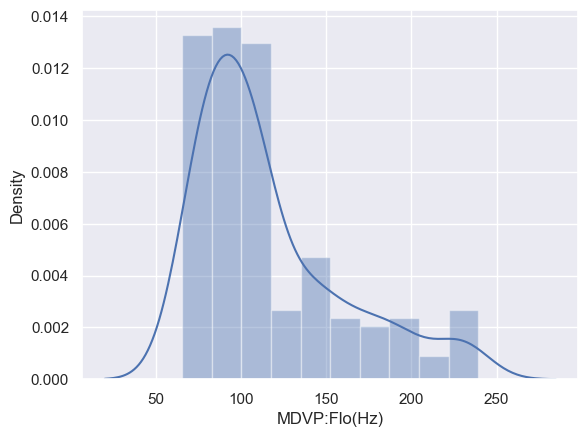

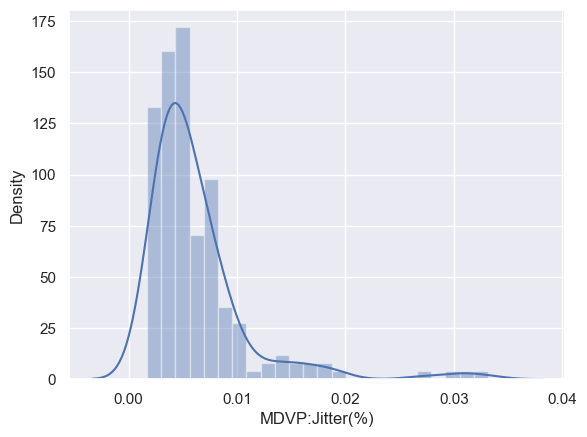

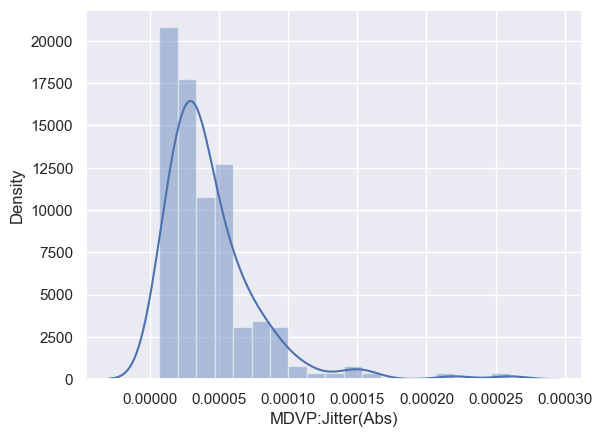

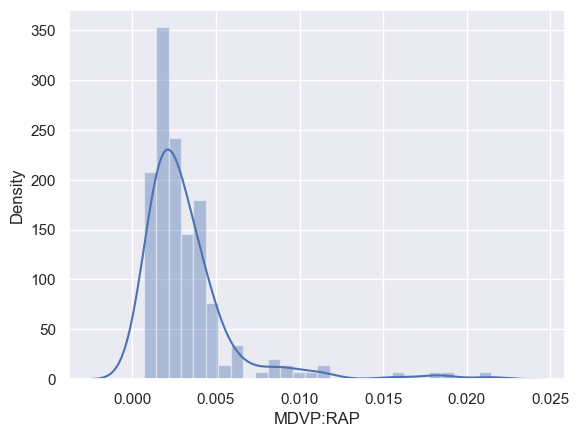

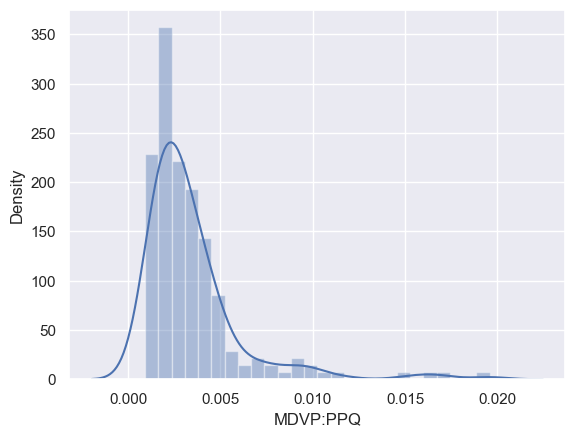

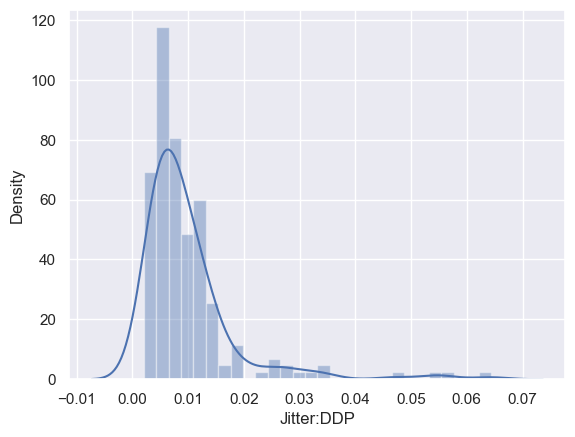

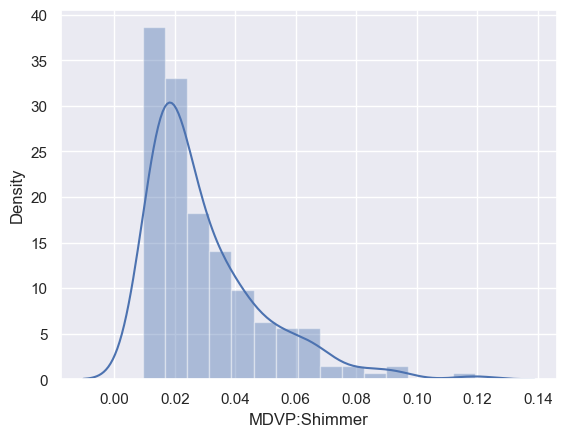

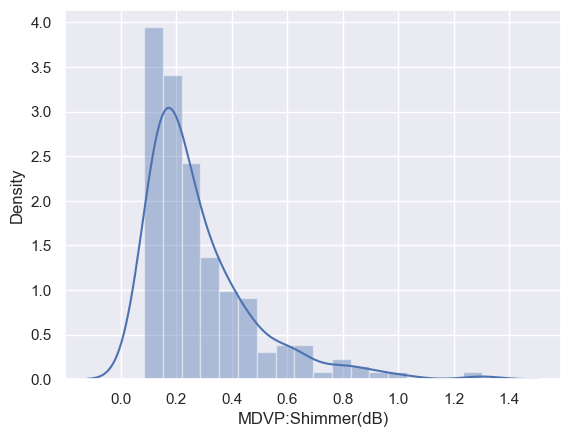

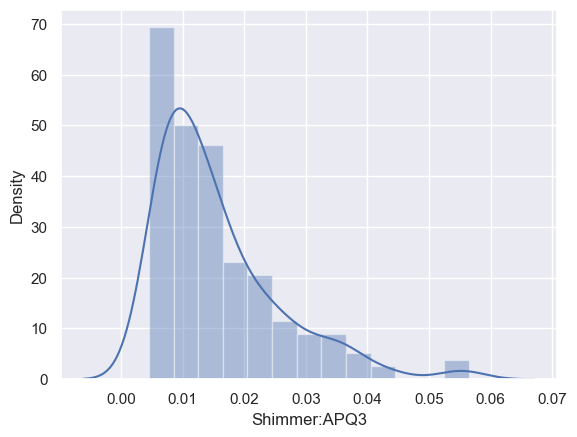

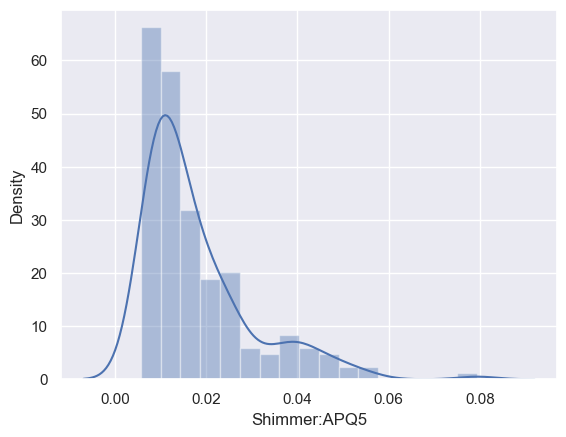

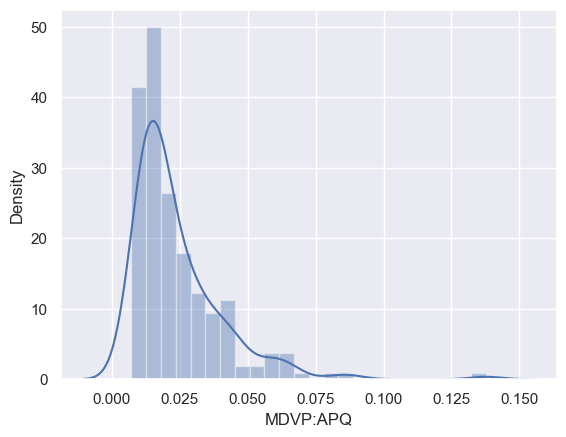

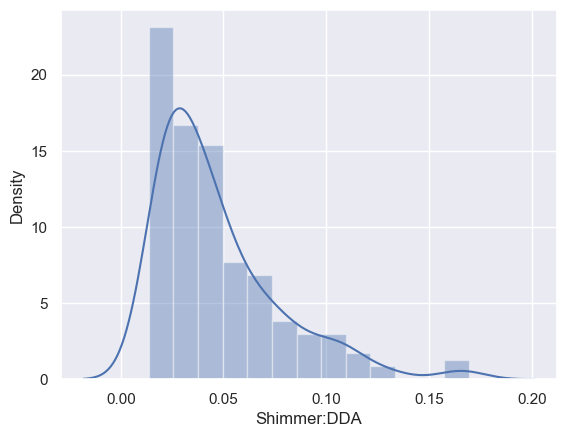

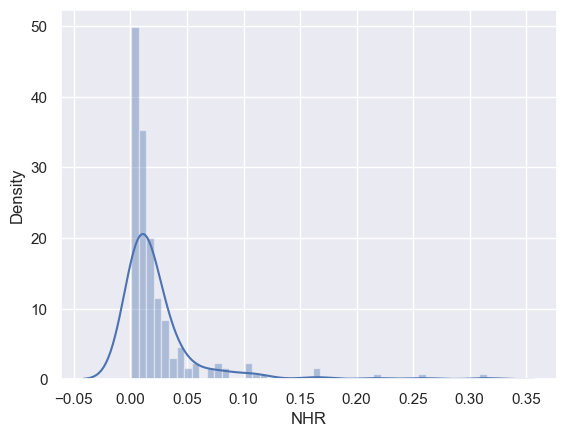

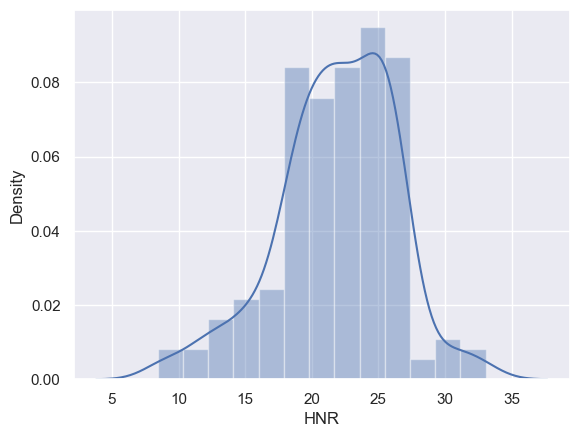

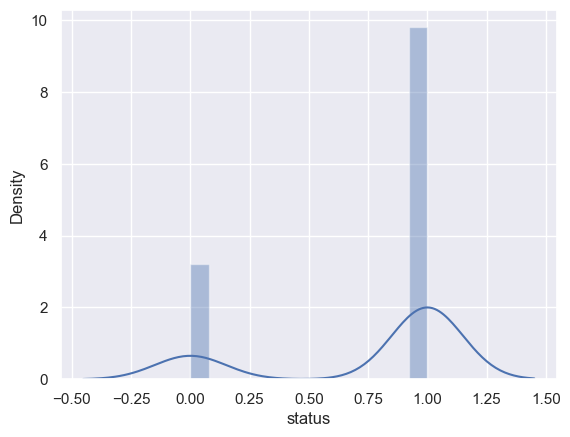

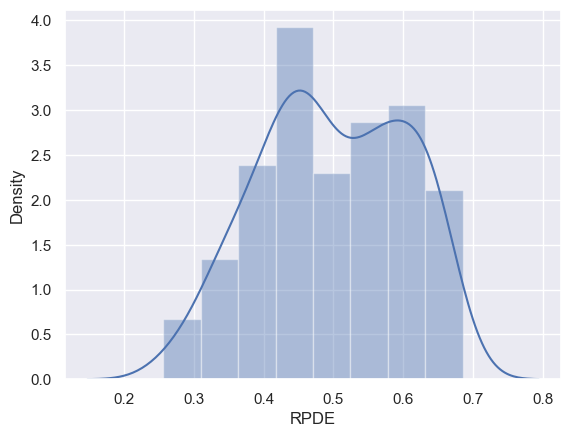

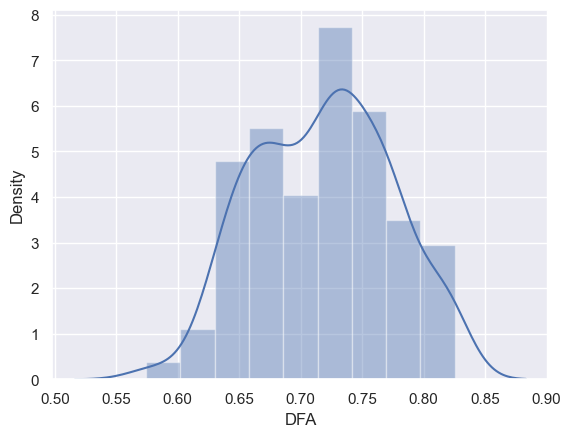

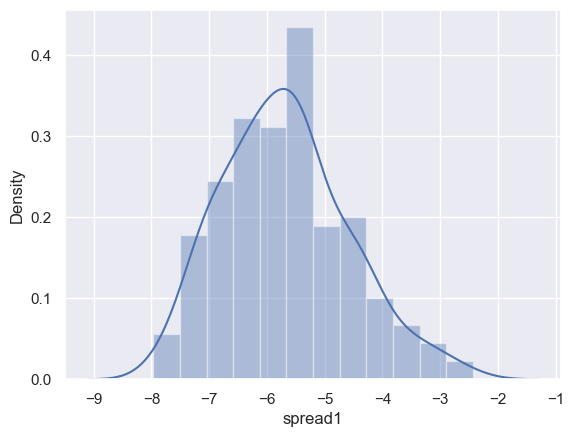

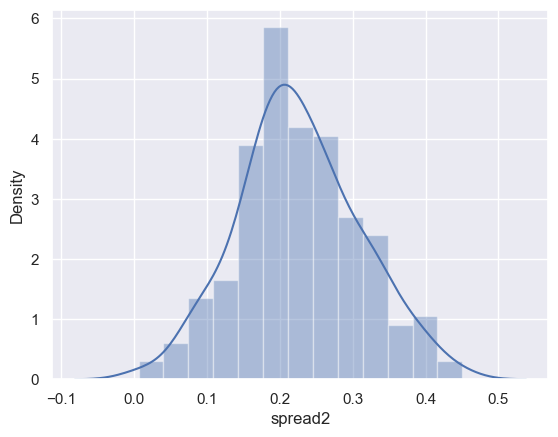

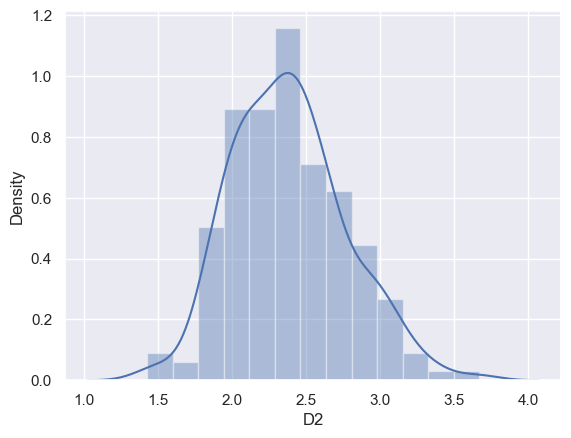

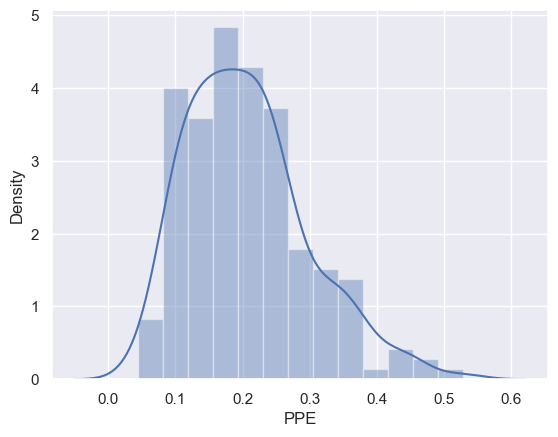

In [10]:
# find the distribution of the dataset

def distplot(col):
    sns.distplot(df[col])
    plt.show()
    
for i in list(df.columns)[1:]:
    distplot(i)

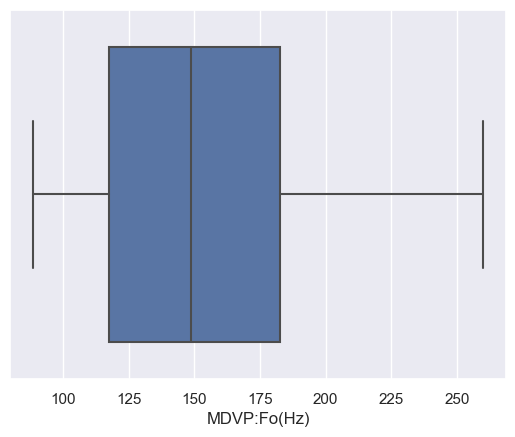

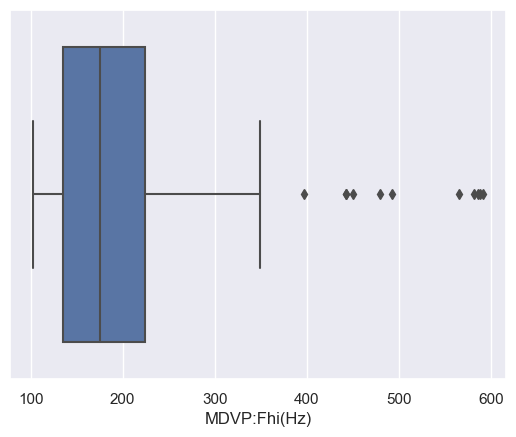

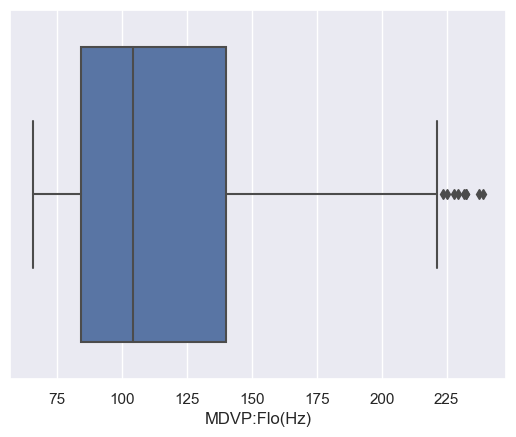

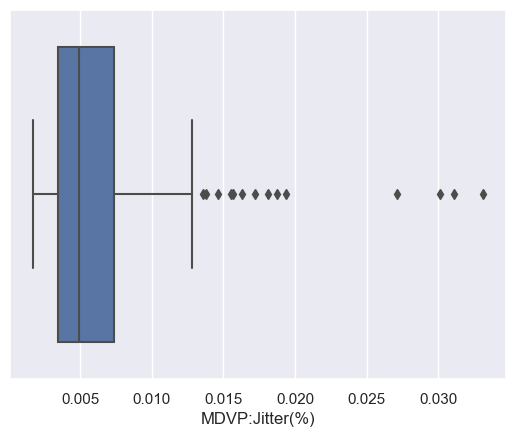

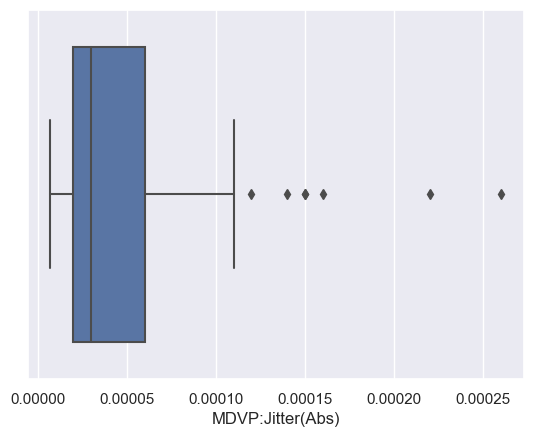

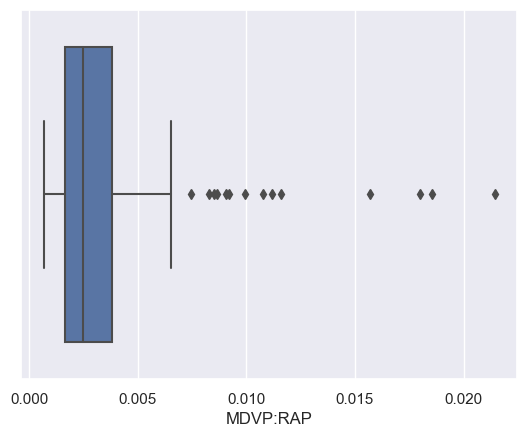

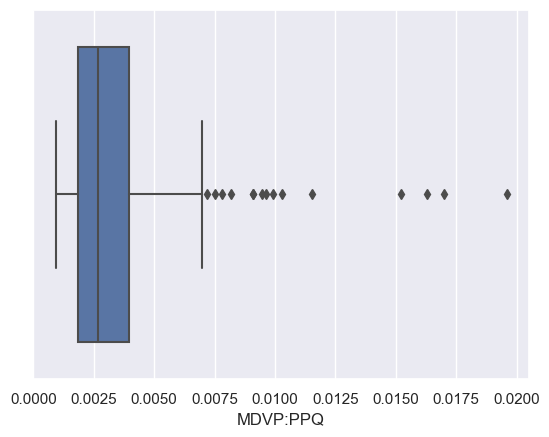

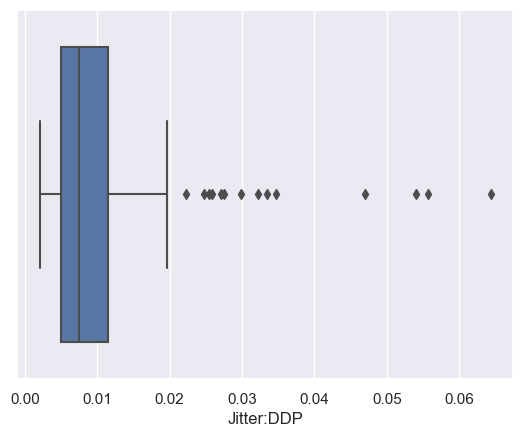

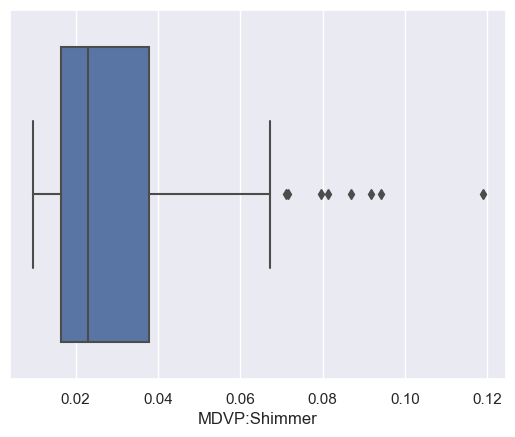

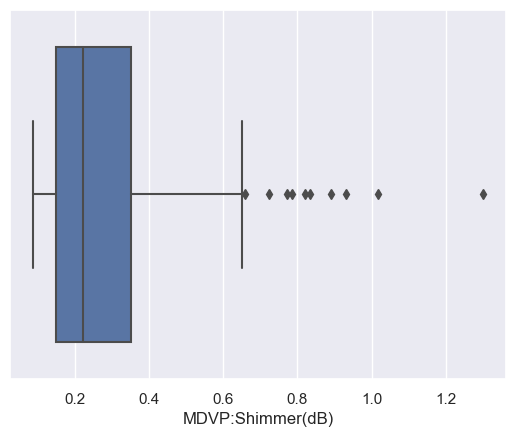

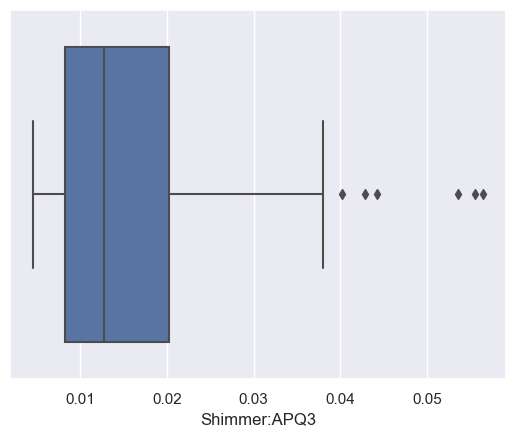

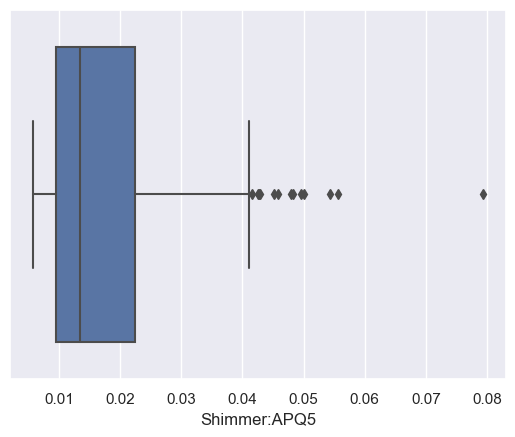

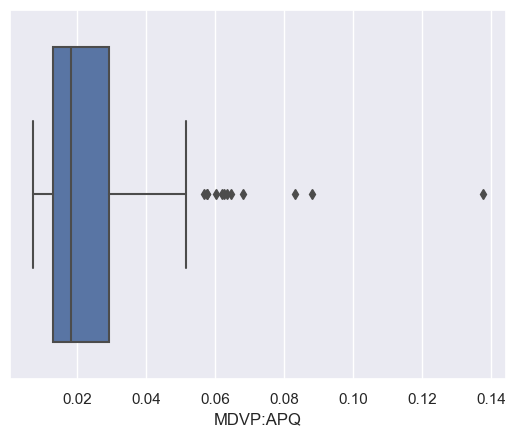

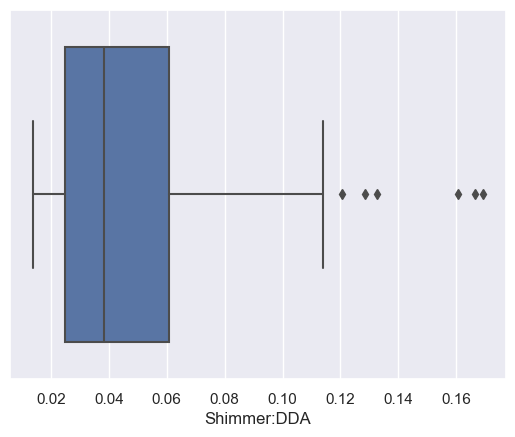

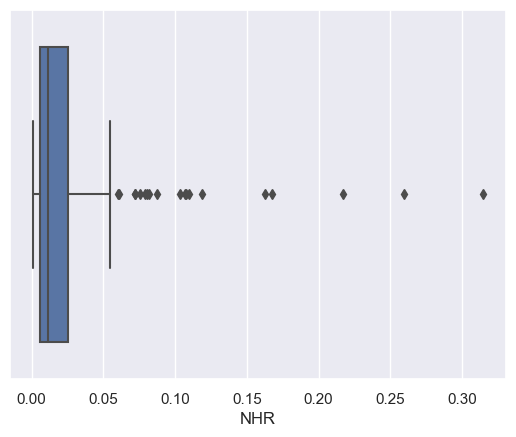

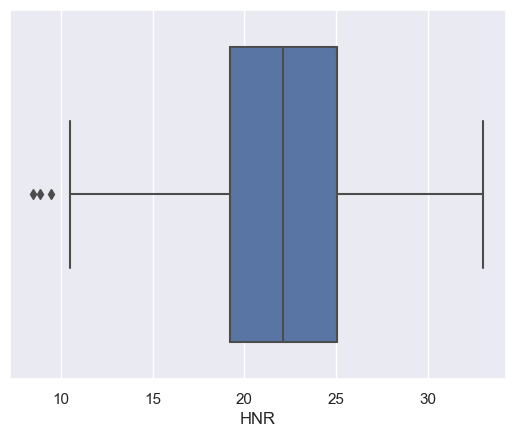

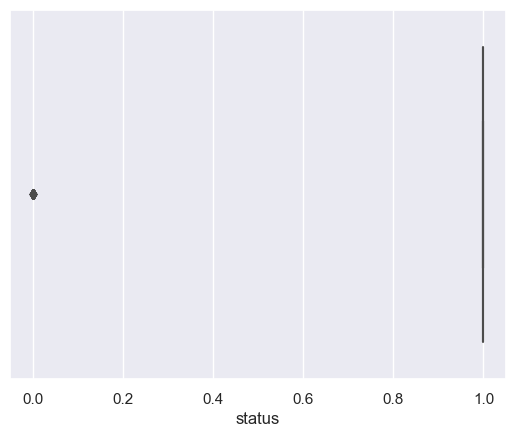

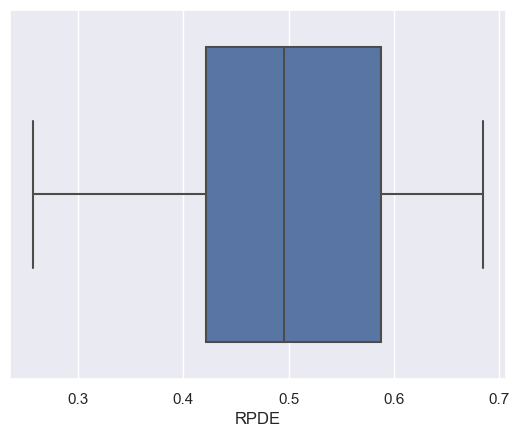

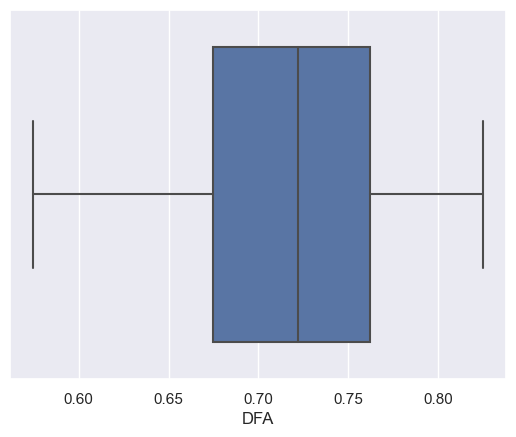

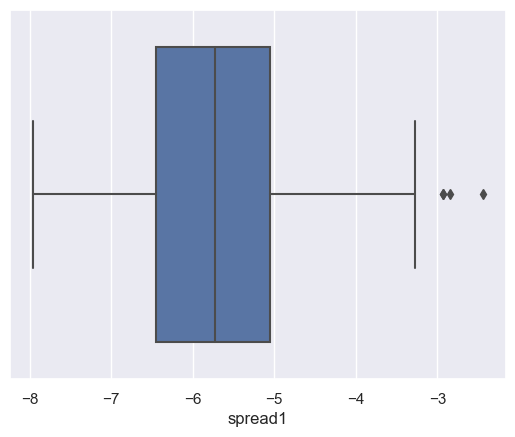

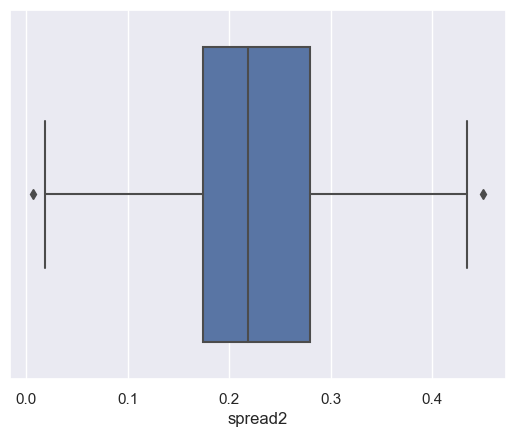

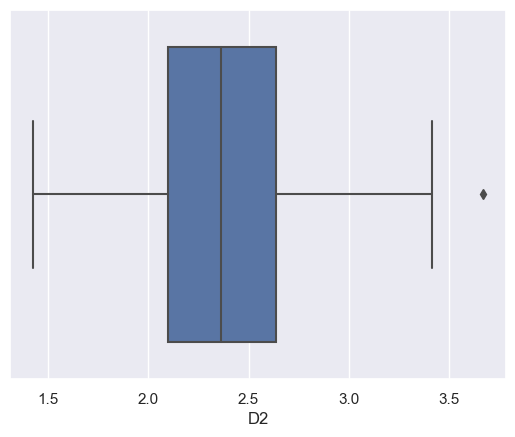

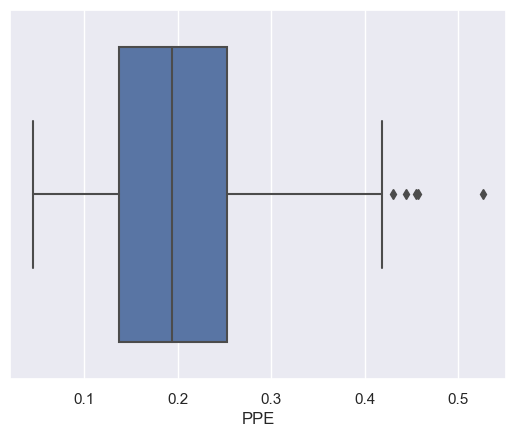

In [11]:
# find the distribution of the dataset

def boxplot(col):
    sns.boxplot(df[col])
    plt.show()
    
for i in list(df.columns)[1:]:
    boxplot(i)

<AxesSubplot:>

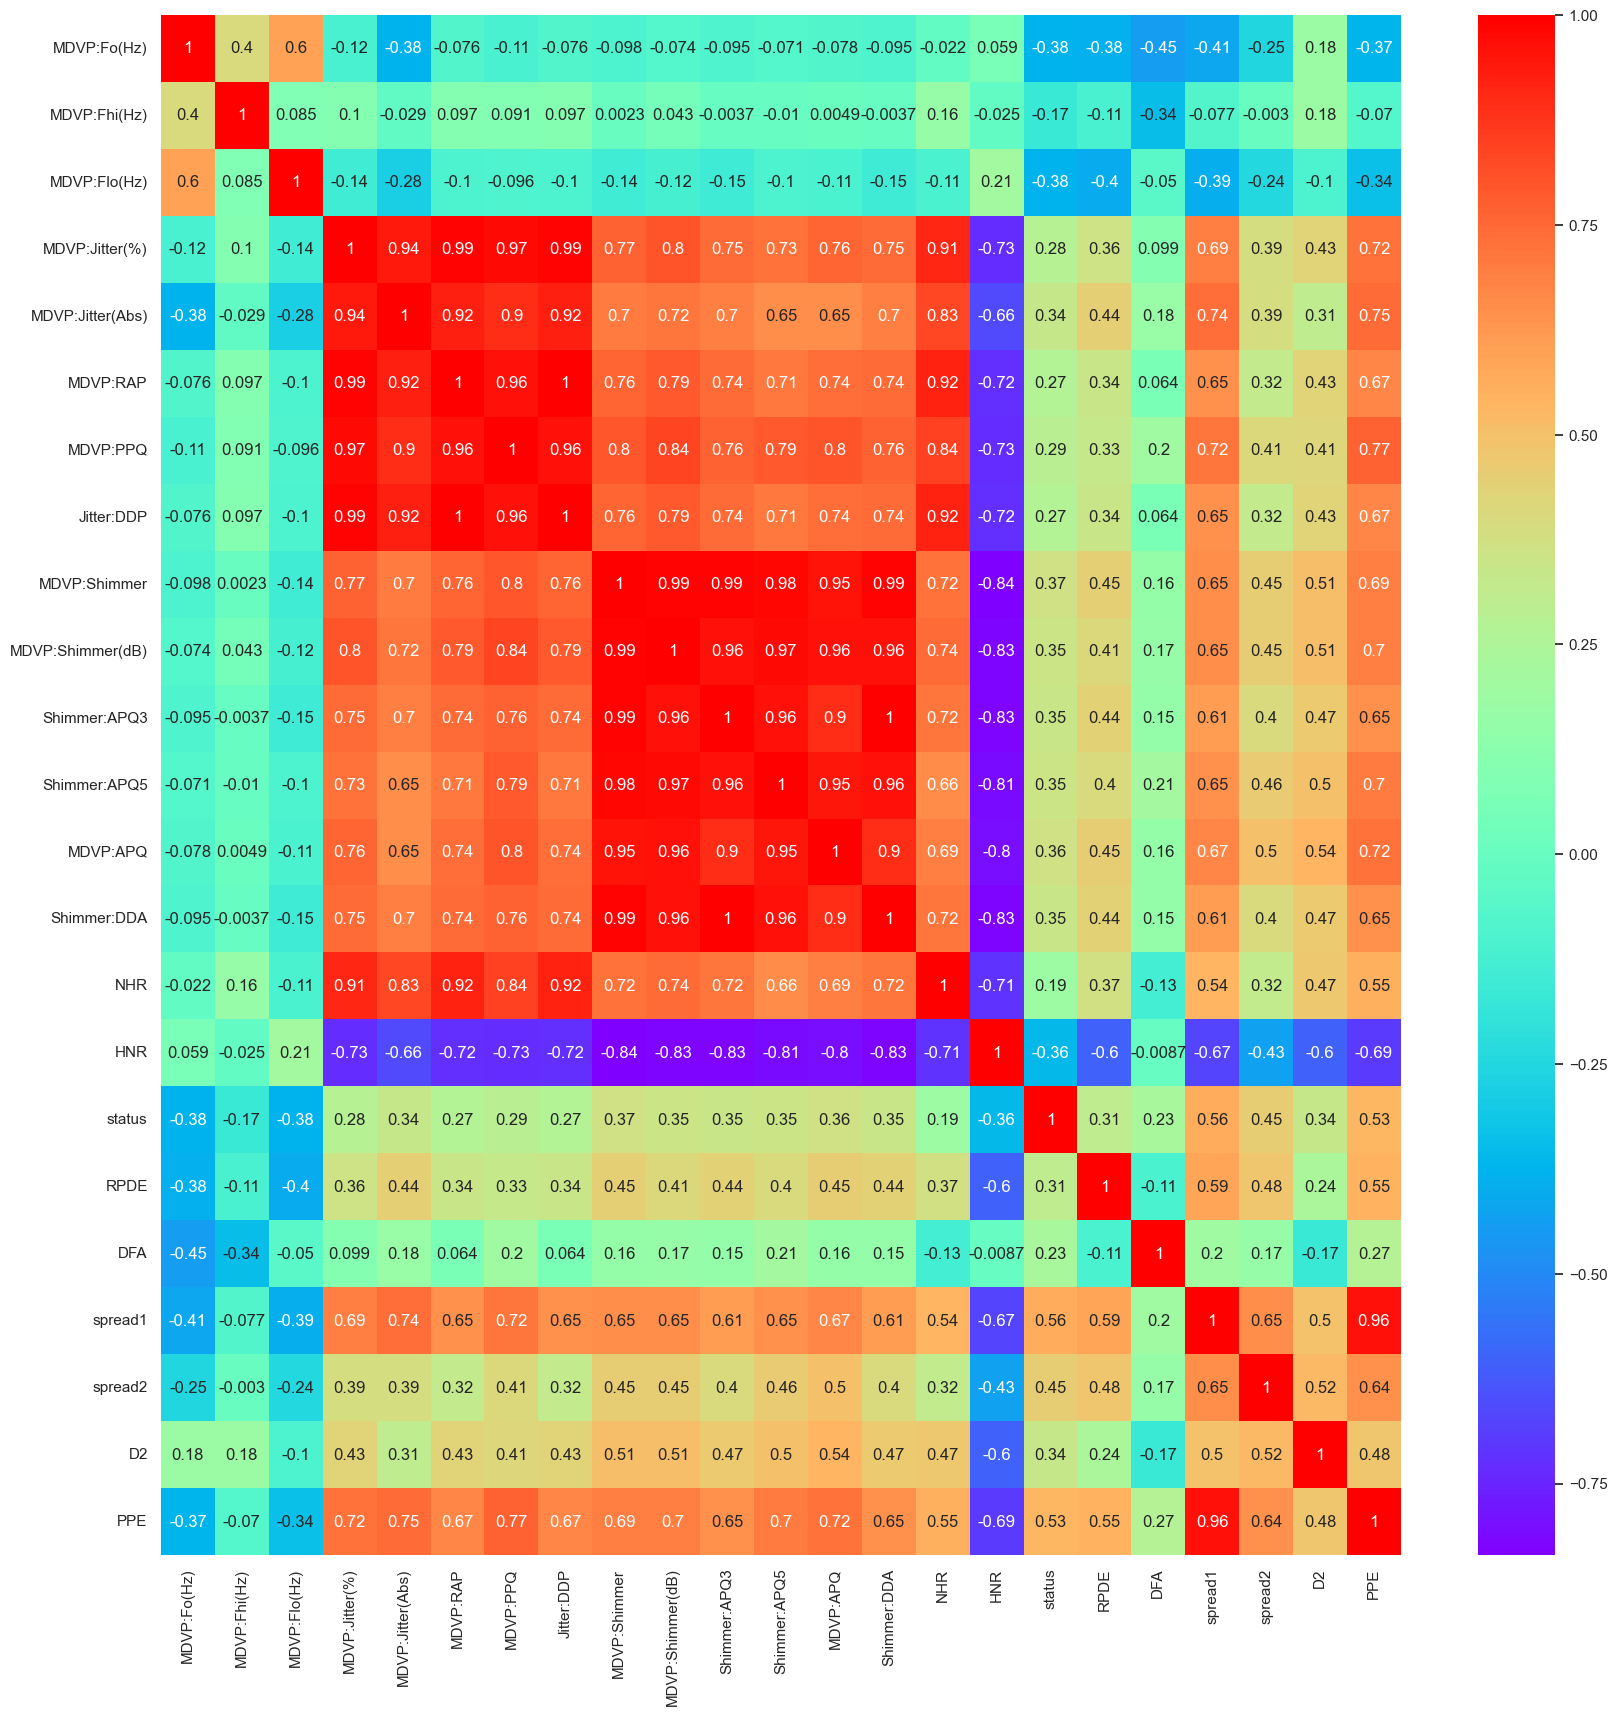

In [12]:
# find correlation
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr,annot = True, cmap='rainbow')

In [70]:
x = df.drop(['status','name'],axis=1)
y = df['status']

SyntaxError: invalid syntax (2431606755.py, line 1)

In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [16]:
# Balancing imbalnce data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x,y)
print(y.value_counts())
print("########")
print(y_ros.value_counts())

1    147
0     48
Name: status, dtype: int64
########
1    147
0    147
Name: status, dtype: int64


In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
x =  scaler.fit_transform(x_ros)
y = y_ros

In [19]:


# Preprocessing part completed
x.shape

(294, 22)

# Applying PCA

In [20]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA(.95)
x_pca = pca.fit_transform(x)
print(x.shape)
print(x_pca.shape)

(294, 22)
(294, 8)


In [22]:
x_pca_d = pd.DataFrame(x_pca)

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca,y,test_size=0.2,random_state=1)

# Model Building

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [25]:
list_met = []
list_accuracy = []

# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(C=0.4, max_iter=1000, solver='liblinear')
lr = classifier1.fit(x_train, y_train)
# Prediction
y_predlr = classifier1.predict(x_test)

# Accuracy
accuracy_LR = accuracy_score(y_test, y_predlr)

In [26]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(random_state=14)
dt = classifier2.fit(x_train, y_train)
# Prediction
y_preddt = classifier2.predict(x_test)

# Accuracy
accuracy_DT = accuracy_score(y_test, y_preddt)    

In [27]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(random_state=14)
rf = classifier3.fit(x_train, y_train)
# Prediction
y_predrf = classifier3.predict(x_test)

# Accuracy
accuracy_RF = accuracy_score(y_test, y_predrf)   

In [28]:
classifier4 = RandomForestClassifier(criterion='entropy',random_state=14)
rfe = classifier4.fit(x_train, y_train)
# Prediction
y_predrfe = classifier4.predict(x_test)

# Accuracy
accuracy_RFE = accuracy_score(y_test, y_predrfe)   

In [29]:
# Support Vector Machine
from sklearn.svm import SVC
classifier5 = SVC()
svm = classifier5.fit(x_train, y_train)
# Prediction
y_predsvm = classifier5.predict(x_test)

# Accuracy
accuracy_SVM = accuracy_score(y_test, y_predsvm)   

In [30]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier6 = KNeighborsClassifier()
knn = classifier6.fit(x_train, y_train)
# Prediction
y_predknn = classifier6.predict(x_test)

# Accuracy
accuracy_KNN = accuracy_score(y_test, y_predknn)   

In [31]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier7 = GaussianNB()
gnb = classifier7.fit(x_train, y_train)
# Prediction
y_predgnb = classifier7.predict(x_test)

# Accuracy
accuracy_GNB = accuracy_score(y_test, y_predgnb)  

In [32]:
# Bernouli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
classifier8 = BernoulliNB()
bnb = classifier8.fit(x_train, y_train)
# Prediction
y_predbnb = classifier8.predict(x_test)

# Accuracy
accuracy_BNB = accuracy_score(y_test, y_predbnb)  

In [35]:
# combining all  the above model by using  voting classifier model
from sklearn.ensemble import VotingClassifier
evc = VotingClassifier(estimators = [('lr',lr), ('DT',dt),('RF',rf),
                                            ('RFE',rfe),('SVC',svm),('KNN',knn),
                                            ('GNB',gnb),('BNB',bnb)],  voting = 'hard',
                                            flatten_transform=True)
model_evc = evc.fit(x_train, y_train)

# Prediction
pred_evc = evc.predict(x_test)
# evaluation
accuracy_evc = accuracy_score(y_test,pred_evc)

list1 = ['Logistic Regression','Decision Tree','Random Forest Gini',
        'Random Forest Entropy', 'Support Vector', 'K Nearest Neighbors',
        'GaussianNB','BernoulliNB','Voting Classifier']
list2 = [accuracy_LR,accuracy_DT,accuracy_RF,accuracy_RFE,accuracy_SVM,accuracy_KNN,accuracy_GNB,accuracy_BNB,accuracy_evc]

list3 = [classifier1,classifier2,classifier3,classifier4,classifier5,classifier6,classifier7,classifier8]




In [36]:
df_accuracy = pd.DataFrame({'Method Used':list1, 'Accuracy': list2})
print(df_accuracy)

             Method Used  Accuracy
0    Logistic Regression  0.779661
1          Decision Tree  1.000000
2     Random Forest Gini  1.000000
3  Random Forest Entropy  1.000000
4         Support Vector  0.898305
5    K Nearest Neighbors  0.966102
6             GaussianNB  0.813559
7            BernoulliNB  0.728814
8      Voting Classifier  0.966102


AxesSubplot(0.125,0.11;0.775x0.77)


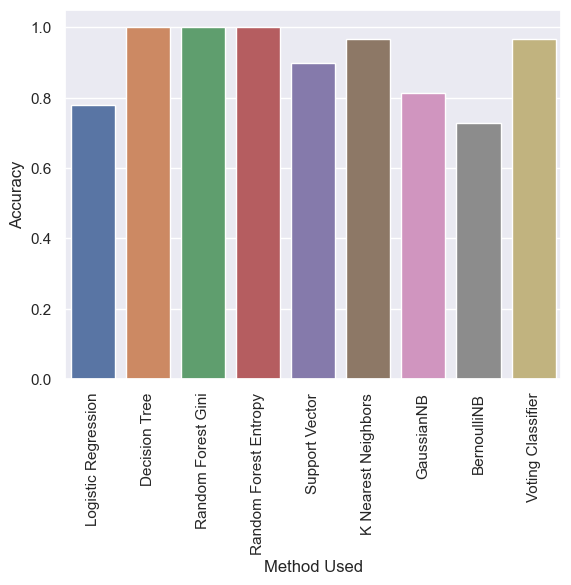

In [37]:

charts = sns.barplot(x='Method Used', y = 'Accuracy', data=df_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)

# Pickling The Model File For Deployment

In [47]:
import pickle

In [49]:
pickle.dump(classifier4,open('classification4.pkl','wb'))

In [51]:
classify = pickle.load(open('classification4.pkl','rb'))

In [87]:
x.iloc[0]

MDVP:Fo(Hz)         119.992000
MDVP:Fhi(Hz)        157.302000
MDVP:Flo(Hz)         74.997000
MDVP:Jitter(%)        0.007840
MDVP:Jitter(Abs)      0.000070
MDVP:RAP              0.003700
MDVP:PPQ              0.005540
Jitter:DDP            0.011090
MDVP:Shimmer          0.043740
MDVP:Shimmer(dB)      0.426000
Shimmer:APQ3          0.021820
Shimmer:APQ5          0.031300
MDVP:APQ              0.029710
Shimmer:DDA           0.065450
NHR                   0.022110
HNR                  21.033000
RPDE                  0.414783
DFA                   0.815285
spread1              -4.813031
spread2               0.266482
D2                    2.301442
PPE                   0.284654
Name: 0, dtype: float64

In [89]:
scaler_pkl.transform(x.head(1))

array([[-9.40310783e-01, -5.36134180e-01, -9.99920007e-01,
         5.59138174e-01,  1.05888232e+00,  3.27756567e-01,
         1.06622511e+00,  3.26326897e-01,  1.08126235e+00,
         1.06615561e+00,  9.09800996e-01,  1.50514420e+00,
         6.19177463e-01,  9.09417104e-01,  3.34869185e-02,
        -3.99054686e-01, -6.36211596e-01,  1.91464343e+00,
         1.14281355e+00,  7.45199544e-01,  6.52900369e-04,
         1.22989097e+00]])

In [64]:
pickle.dump(pca,open('pca.pkl','wb'))

In [65]:
pca_pkl = pickle.load(open('pca.pkl','rb'))

In [67]:
pickle.dump(scaler,open('scaler.pkl','wb'))

In [68]:
scaler_pkl = pickle.load(open('scaler.pkl','rb'))

In [90]:
classify.predict(pca_pkl.transform(scaler_pkl.transform(x.head(1))))

array([1], dtype=int64)

In [38]:
# Other Evaluation Method
from sklearn.metrics import roc_curve, auc

In [39]:
y_pred4_train = classifier4.predict(x_train)
y_pred4_test = classifier4.predict(x_test)

# KNN
pred_knn_train = classifier5.predict(x_train)
pred_knn_test = classifier5.predict(x_test)

In [40]:
print(confusion_matrix(y_train,y_pred4_train))
print(confusion_matrix(y_test,y_pred4_test))

[[118   0]
 [  0 117]]
[[29  0]
 [ 0 30]]


In [41]:
print(confusion_matrix(y_train,pred_knn_train))
print(confusion_matrix(y_test,pred_knn_test))

[[113   5]
 [ 19  98]]
[[27  2]
 [ 4 26]]


In [42]:
print(classification_report(y_train,y_pred4_train))
print(classification_report(y_test,y_pred4_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       117

    accuracy                           1.00       235
   macro avg       1.00      1.00      1.00       235
weighted avg       1.00      1.00      1.00       235

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        30

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [43]:
print(classification_report(y_train,pred_knn_train))
print(classification_report(y_test,pred_knn_test))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90       118
           1       0.95      0.84      0.89       117

    accuracy                           0.90       235
   macro avg       0.90      0.90      0.90       235
weighted avg       0.90      0.90      0.90       235

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.87      0.90        30

    accuracy                           0.90        59
   macro avg       0.90      0.90      0.90        59
weighted avg       0.90      0.90      0.90        59



In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [45]:
# roc and  auc
def plot_roc(model,x_test,y_test):
    probabilities = model.predict_proba(np.array(x_test))
    predictions = probabilities
    fpr, tpr, threshold = roc_curve(y_test,predictions[:,1])
    roc_auc = auc(fpr,tpr)
    
    plt.title("Receiver Operating Characteristic")
    plt.plot(fpr,tpr,'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")

In [46]:
plot_roc(rfe,x_test,y_test)

ValueError: X has 22 features, but RandomForestClassifier is expecting 8 features as input.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu',input_dim=22))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy',metrics =['accuracy'])
model.fit(x_train,y_train, batch_size=32,epochs=200,validation_data=(x_test,y_test))

In [ ]:
x_test.shape